# DeepTile Demo

## Imports

In [1]:
import deeptile
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from deeptile.extensions import segmentation
from deeptile.extensions import stitch
matplotlib.rcParams['figure.dpi'] = 300

## Example: ND2

In [2]:
# Create DeepTile Object
dt = deeptile.load('sample_images/sample.nd2')

In [3]:
# Configure
overlap = None
dt.configure(overlap=overlap)

In [4]:
# Get tiles
tiles = dt.get_tiles()

In [5]:
# Individual tile
tiles[0, 0]

dask.array<getitem, shape=(1022, 1024), dtype=uint16, chunksize=(1022, 1024), chunktype=numpy.ndarray>

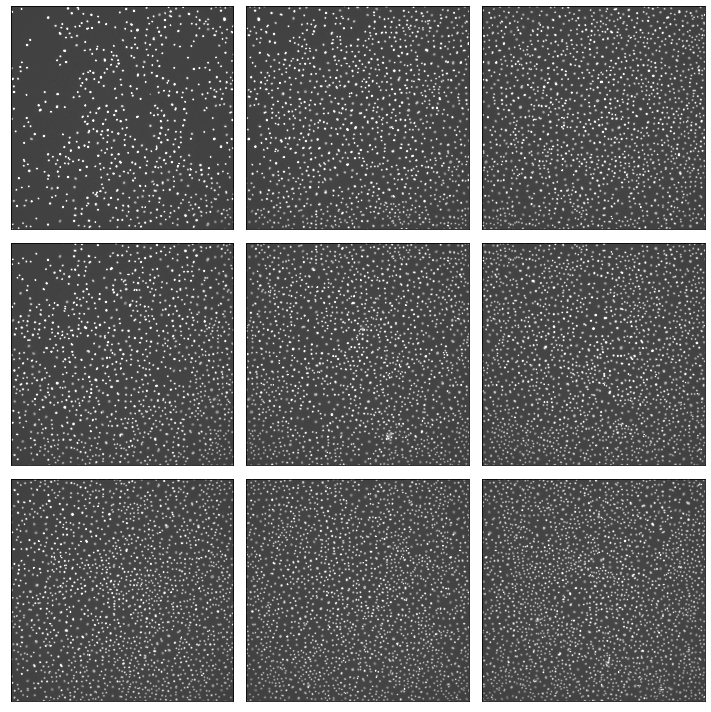

In [6]:
# Show the tiles
fig, ax = plt.subplots(tiles.shape[0], tiles.shape[1], figsize=(10, 10))
for (i, j), tile in np.ndenumerate(tiles):
    ax[i, j].imshow(tile, vmin=0, vmax=2000, cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
plt.tight_layout()

In [7]:
# Check overlap
dt.overlap

(0.1, 0.1)

In [8]:
# Stitch ND2
image = dt.stitch(tiles, stitch.stitch_tiles(blend=True))

In [9]:
# Check stitch size
image.shape

(2862, 2868)

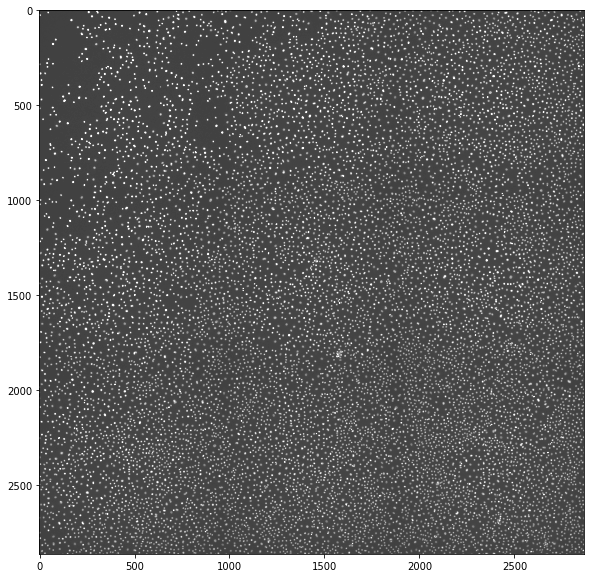

In [10]:
# Show the stitched image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image, vmin=0, vmax=2000, cmap='gray')

(2862.0, 0.0)

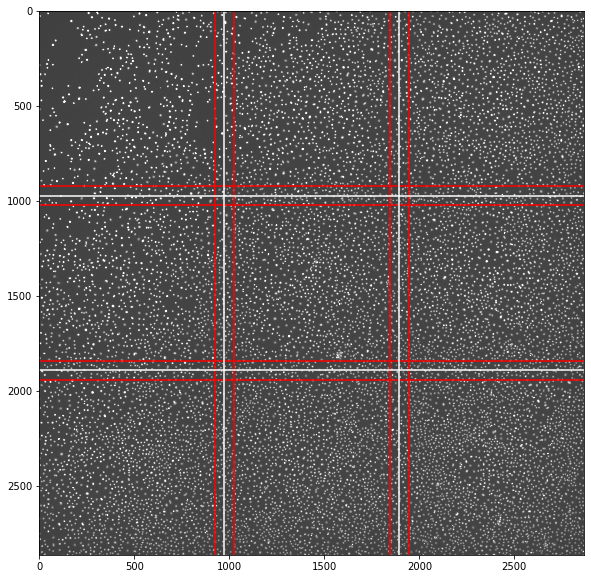

In [11]:
# Show the stitched mask with guides
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image, vmin=0, vmax=2000, cmap='gray')
for hti in dt.tile_indices[0].flatten()[1:-1]:
    ax.axhline(hti, color='r', linestyle='-')
for vti in dt.tile_indices[1].flatten()[1:-1]:
    ax.axvline(vti, color='r', linestyle='-')
for hbi in dt.border_indices[0][1:-1]:
    ax.axhline(hbi, color='w', linestyle='-')
for vbi in dt.border_indices[1][1:-1]:
    ax.axvline(vbi, color='w', linestyle='-')
ax.set_xlim(0, image.shape[-1])
ax.set_ylim(image.shape[-2], 0)

In [12]:
# Segment tiles and stitch

model_parameters = {'gpu': True, 'model_type': 'nuclei'}
eval_parameters = {'diameter': 10}
func_process = segmentation.cellpose_segmentation(model_parameters, eval_parameters)

masks = dt.process(tiles, func_process)
mask = dt.stitch(masks, stitch.stitch_masks())

2022-06-08 17:11:13,237 [INFO] WRITING LOG OUTPUT TO /home/wniu/.cellpose/run.log
2022-06-08 17:11:15,203 [INFO] ** TORCH CUDA version installed and working. **
2022-06-08 17:11:15,204 [INFO] >>>> using GPU
2022-06-08 17:11:15,204 [INFO] >> nuclei << model set to be used
2022-06-08 17:11:15,257 [INFO] >>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
2022-06-08 17:11:15,259 [INFO] ~~~ FINDING MASKS ~~~
2022-06-08 17:11:15,749 [INFO] >>>> TOTAL TIME 0.49 sec
2022-06-08 17:11:15,751 [INFO] ~~~ FINDING MASKS ~~~
2022-06-08 17:11:16,274 [INFO] >>>> TOTAL TIME 0.52 sec
2022-06-08 17:11:16,275 [INFO] ~~~ FINDING MASKS ~~~
2022-06-08 17:11:16,833 [INFO] >>>> TOTAL TIME 0.56 sec
2022-06-08 17:11:16,834 [INFO] ~~~ FINDING MASKS ~~~
2022-06-08 17:11:17,373 [INFO] >>>> TOTAL TIME 0.54 sec
2022-06-08 17:11:17,374 [INFO] ~~~ FINDING MASKS ~~~
2022-06-08 17:11:17,950 [INFO] >>>> TOTAL TIME 0.58 sec
2022-06-08 17:11:17,952 [INFO] ~~~ FINDING MASKS ~~~
2022-06-08 17:11:18,537

In [13]:
# Data structures
print(mask.shape)
print(masks.shape)
print(tiles.shape)

(2862, 2868)
(3, 3)
(3, 3)


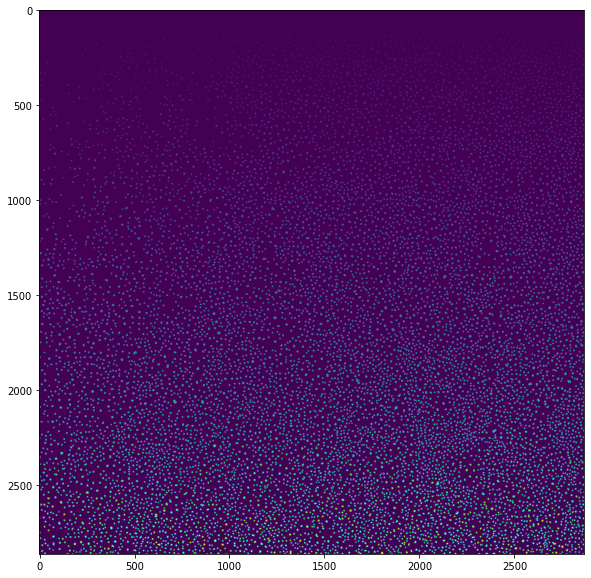

In [14]:
# Show the stitched mask
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mask)